In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('diabetes_prediction_dataset.csv')

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

print(df.shape)
df.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


[[-8.41046744e-01  1.69270354e+00 -2.84439447e-01 ... -3.21055792e-01
   1.00170572e+00  4.77042159e-02]
 [-8.41046744e-01  5.38006427e-01 -2.84439447e-01 ... -1.15583678e-04
   1.00170572e+00 -1.42620999e+00]
 [ 1.18723364e+00 -6.16690686e-01 -2.84439447e-01 ... -1.15583678e-04
   1.61108022e-01  4.89878478e-01]
 ...
 [ 1.18723364e+00  1.07094356e+00 -2.84439447e-01 ...  7.67292549e-02
   1.61108022e-01  4.16182767e-01]
 [-8.41046744e-01 -7.94336396e-01 -2.84439447e-01 ...  1.22036126e+00
  -1.42668764e+00 -9.34905254e-01]
 [-8.41046744e-01  6.71240710e-01 -2.84439447e-01 ... -7.36921977e-01
   1.00170572e+00 -1.18055762e+00]]


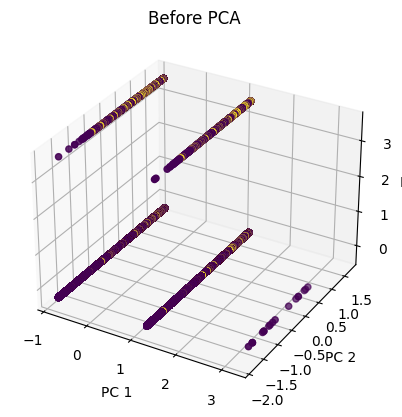

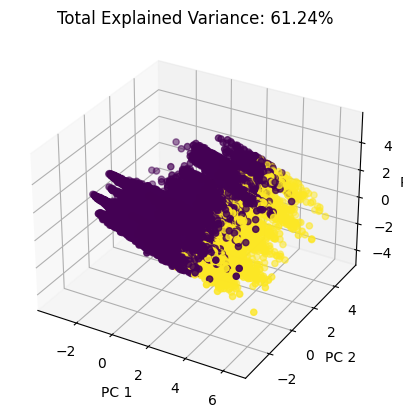

In [8]:

X2 = df.drop('diabetes', axis=1)

scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

print(X2)

# Get the principal components
pc1 = X2[:, 0]
pc2 = X2[:, 1]
pc3 = X2[:, 2]

# Create a scatter plot in 3D
fig = plt.figure()
ab = fig.add_subplot(111, projection='3d')
ab.scatter(pc1, pc2, pc3, c=df['diabetes'])

# Set the axis labels
ab.set_xlabel('PC 1')
ab.set_ylabel('PC 2')
ab.set_zlabel('PC 3')

ab.set_title(f'Before PCA')

plt.show()

# Perform PCA on the feature data
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X2)

# Get the principal components
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]
pc3 = X_pca[:, 2]

# Create a scatter plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc1, pc2, pc3, c=df['diabetes'])

# Set the axis labels
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# Set the title
total_var = sum(pca.explained_variance_ratio_) * 100
ax.set_title(f'Total Explained Variance: {total_var:.2f}%')

# Show the plot
plt.show()

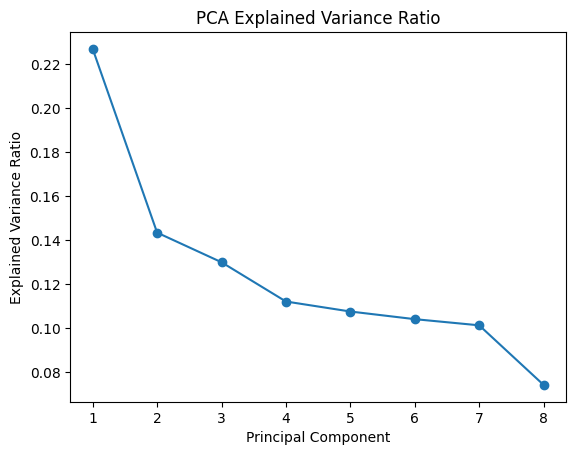

In [6]:
# Zero-center the scaled feature data
X_zero_centered = X2 - X2.mean(axis=0)

# Perform PCA on the zero-centered feature data
pca = PCA()
X_pca = pca.fit_transform(X_zero_centered)

# Calculate the explained variance ratio for each principal component
explained_variances = pca.explained_variance_ratio_

# Create a line plot for the explained variance ratio
plt.plot(range(1, len(explained_variances) + 1), explained_variances, marker='o')

# Add labels and title
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')

# Display the plot
plt.show()

In [9]:
print(abs( pca.components_ ))


[[0.01861746 0.55603315 0.38868659 0.30384809 0.33666164 0.45282312
  0.24744915 0.25972809]
 [0.58039498 0.10865    0.07107009 0.3583351  0.44393218 0.22537659
  0.37468601 0.36003035]
 [0.38512164 0.17834349 0.18539982 0.43550655 0.05913705 0.00119136
  0.5493815  0.5389965 ]
 [0.70026527 0.04209211 0.19147813 0.49840826 0.29262216 0.37017392
  0.00489588 0.01008491]]
